In [1]:
##########################################################
# https://github.com/zhanglz95/WApy
##########################################################

# 测试数据(数据默认拟时针方向)
# ----------------------------------------------------------------------------------------------------------------
# S = "161 137 429 376 558 192 619 418 281 431"
# C = "183 391 224 240 610 107 657 361 429 376"

# resut
# ####################
# 261.867222318,226.95248557436787
# 429.0,376.0
# 262.690140845,386.1408450704268
# 215.627162458,270.8365480205366
# 224,240
# ####################
# 429.0,376.0
# 558,192
# 604.546479034,364.45088953723683
# ####################
# ----------------------------------------------------------------------------------------------------------------
# C包含S
# S = "281 159 472 155 569 248 506 419 242 366"
# C = "149 241 282 72 559 111 628 406 418 475 170 407"

# result
###################
# 281,159
# 472,155
# 569,248
# 506,419
# 242,366
###################
# ----------------------------------------------------------------------------------------------------------------
# S包含C
# S = "259 113 689 107 548 481 103 374"
# C = "306 178 565 160 596 263 441 387 255 326"
#
# ####################
# 306,178
# 565,160
# 596,263
# 441,387
# 255,326
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 完全不相交
# S = "79 176 221 169 341 240 282 430 52 429"
# C = "456 111 680 172 691 287 413 320"

# result
# ####################
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 底边重合
# S = "247 183 536 181 536 374 129 374"
# C = "128 71 295 70 455 374 263 374"

# result
# ####################
# 455.0,374.0
# 263.0,374.0
# 206.853653781,247.98264515291112
# 247,183
# 354.08365088,182.258936672
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 文档示例1
# S = "70 104 227 357 281 219 412 455 625 299 688 484 120 487"
# C = "125 256 689 242 710 427 40 371"

# reverse isClockwise = False
# S = "70 104 120 487 688 484 625 299 412 455 281 219 227 357"
# C = "125 256 40 371 710 427 689 242"

# result
# #######################################################################
# 163.727558838,255.03867761749646
# 227,357
# 267.909855208,252.45259224660992
# 299.13873038,251.6774074019149
# 381.203045416,399.5184634974567
# 105.571884481,376.4806351208
# 95.120741418,296.42487925800003
# 125,256
# ####################
# 476.83944765,407.5119538334328
# 625,299
# 667.375977811,423.4373951603224
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 文档示例2
# S = "126 121 335 391 575 194 633 442 169 434"
# C = "176 234 622 132 656 362 90 328"

# result
# ####################
# 207.83466678,226.71942598304932
# 295.802997653,340.3627242406396
# 154.973898097,331.9030256807385
# 146.025,266.7633720930233
# 176,234
# ####################
# 389.810382578,346.00981096758306
# 575,194
# 613.696002775,359.4587704847173
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 文档示例3
# S = "173 106 333 366 663 232 663 457 128 443"
# C = "81 183 737 179 713 379 59 292"

# result
# ####################
# 219.863551402,182.15327102803658
# 307.831667948,325.1014604151009
# 146.607013414,303.6541439862661
# 162.784691161,182.50131285877438
# ####################
# 402.655510288,337.71564127684405
# 663,232
# 663.0,372.34862385321105
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 点在边上重合（图5-右）
# S = "180 115 357 115 378 293 180 293"
# C = "123 115 304 115 304 232 44 232"

# result
# ####################
# 180.0,232.0
# 180.0,115.0
# 304,115
# 304,115.0
# 304,232
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 点在边上
# S = "242 78 480 77 480 289 242 289"
# C = "162 110 388 19 386 103 162 247"

# result
# ####################
# 242.0,195.57142857142858
# 242,78
# 386.609704852,77.39239621600063
# 386,103
# ####################
# ----------------------------------------------------------------------------------------------------------------
# 实用测试
# S = "5010.802734 11878.791992 5459.470703 11973.266602 5521.406250 11684.828125 5078.254395 11594.436523 5010.802734 11878.791992"
# C = "5376.000000 11264.000000 5376.000000 11776.000000 5887.000000 11776.000000 5887.000000 11264.000000"

# Datastruct
class baseVertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"(x={self.x}, y={self.y})"
    
class Vertex(baseVertex):
    def __init__(self, x, y, next = None):
        super(Vertex, self).__init__(x, y)
        self.next = next

class Intersection(baseVertex):
    def __init__(self, x, y, nextS = None, nextC = None, crossDi = -1):
        super(Intersection, self).__init__(x, y)
        self.nextS = nextS
        self.nextC = nextC
        self.crossDi = crossDi # -1未定义 0表示进 1表示出
        self.used = False

# 比较浮点数大小
def floatEqual(f1, f2):
    prec = 1e-5
    if abs(f1 - f2) < prec:
        return True
    else:
        return False
def floatLarger(f1, f2):
    if floatEqual(f1, f2):
        return False
    elif f1 > f2:
        return True
    else:
        return False

# 判断顶点是否在多边形内
def isVertexInPolygon(v, list):
    judgeIndex = 0
    for i in range(len(list)):
        j = i + 1
        minY = min(list[i % len(list)].y, list[j % len(list)].y)
        maxY = max(list[i % len(list)].y, list[j % len(list)].y)
        if floatLarger(v.y, maxY) or floatLarger(minY, v.y):
            continue
        if floatEqual(maxY, minY):    # 同一水平线上
            if floatLarger(v.x, max(list[i % len(list)].x, list[j % len(list)].x)): # 点在线段右边 看成一个交点
                judgeIndex += 1
                continue
            elif floatLarger(min(list[i % len(list)].x, list[j % len(list)].x), v.x): # 点在线段左边 无交点
                continue
            else:   # 点在线段上
                return True
        # 做射线
        x = (list[i % len(list)].x - list[j % len(list)].x) / (list[i % len(list)].y - list[j % len(list)].y) * (v.y - list[i % len(list)].y) + list[i % len(list)].x
        if(floatEqual(v.x, x)): # 点在线上
            return None
        if floatLarger(v.x, x): # 有交点
            judgeIndex += 1
    if judgeIndex % 2 != 0:
        return True
    return False

# 用于给交点重排序
def getX(v):
    return v.x
def getY(v):
    return v.y

# 得到垂直/水平交点
def LineCrossH(y, c1, c2):
    return c1.x + (c2.x - c1.x) * (y - c1.y) / (c2.y - c1.y)
def LineCrossV(x, c1, c2):
    return c1.y + (c2.y - c1.y) * (x - c1.x) / (c2.x - c1.x)

# 被垂直线段切割，返回交点
def CutByVerticalLine(s1, s2, list):
    assert floatEqual(s1.x, s2.x)
    crossXs = []
    x = s1.x

    shearedList = [Vertex(r.x, r.y) for r in list]

    minY = min(s1.y, s2.y)
    maxY = max(s1.y, s2.y)

    for i in range(len(list)):
        vertex = list[i]
        c1 = shearedList[i % len(list)]
        c2 = shearedList[(i + 1) % len(list)]

        if(floatEqual(c1.x, c2.x) and floatEqual(c1.x, x)):
            continue    # 重合
        if(floatLarger(c1.x, x) and floatLarger(c2.x, x)):
            continue    # 不相交
        if(floatLarger(x, c1.x) and floatLarger(x, c2.x)):
            continue

        y = float('%.9f' % LineCrossV(x, c1, c2))

        inters = Intersection(x, y)

        print(c1)
        print(c2)
        print("------")

        plt.scatter([x], [y], color="red")  

        next = None
        if((floatLarger(y, minY) and floatLarger(maxY, y))                  # 交点在s1s2中
        # or (c2.y == y and x == s2.x)                # 线段交点在双方末端（在首端无视）
        # or (c1.y == y and x == s1.x)
            or (floatEqual(c2.x, x) and floatEqual(y, s1.y))                # 交点在端点的时候，一条线段的首和另一条的尾才能有交点，上述注释做法在某种情况失效
            or (floatEqual(c1.x, x) and floatEqual(y, s2.y))
            or (floatEqual(y, minY) and (not floatEqual(c1.x, x)) and (not floatEqual(c2.x, x)))  # 交点在s1s2一端
            or (floatEqual(y, maxY) and (not floatEqual(c1.x, x)) and (not floatEqual(c2.x, x)))):
            while not ((isinstance(vertex, Vertex) and isinstance(vertex.next, Vertex)) or (isinstance(vertex, Intersection) and isinstance(vertex.nextS, Vertex))):
                if isinstance(vertex, Vertex):
                    assert isinstance(vertex.next, Intersection)
                    if (floatLarger(c2.x, c1.x) and floatLarger(vertex.next.x, inters.x)) or (floatLarger(c1.x, c2.x) and floatLarger(inters.x, vertex.next.x)):    # c1c2的横坐标不可能相同，否则和s1s2重合
                        break
                    vertex = vertex.next
                else:
                    assert isinstance(vertex.nextS, Intersection)
                    if (floatLarger(c2.x, c1.x) and floatLarger(vertex.nextS.x, inters.x)) or (floatLarger(c1.x, c2.x) and floatLarger(inters.x, vertex.nextS.x)):
                        break
                    vertex = vertex.nextS
            if isinstance(vertex, Vertex):
                next = vertex.next
            else:
                next = vertex.nextS
            if isinstance(vertex, Vertex):
                vertex.next = inters
            else:
                assert isinstance(vertex, Intersection)
                vertex.nextS = inters
            inters.nextS = next

            # 这里记录进出性，默认多边形是顺时针方向，所以线段右侧是“里”，这里判断S的进出，和C相反
            # 这里s1s2垂直，用y判断
            # 默认s1.y > s2.y
            if floatEqual(c1.x, x):
                assert not floatEqual(c2.x, x)
                if floatLarger(c2.x, x):
                    inters.crossDi = 0
                else:
                    inters.crossDi = 1
            elif floatLarger(c1.x, x):
                inters.crossDi = 1
            else:
                inters.crossDi = 0
            if floatLarger(s2.y, s1.y):
                inters.crossDi = 0 if inters.crossDi == 1 else 1

            # print("s1:%s, s2:%s, c1:%s, c2:%s, inter:%s, crossDi:%s" % (("%f, %f" % (s1.x, s1.y)), ("%f, %f" % (s2.x, s2.y)), ("%f, %f" % (c1.x, c1.y)), ("%f, %f" % (c2.x, c2.y)), ("%f, %f" % (inters.x, inters.y)), ("%s" % ("in" if inters.crossDi == 0 else "out"))))
            crossXs.append(inters)
    return crossXs
# 被不垂直线段切割，返回交点
def CutByLine(s1, s2, list):
    # print("s1 = %s, s2 = %s" % (("%f, %f" % (s1.x, s1.y)), ("%f, %f" % (s2.x, s2.y))))

    if floatEqual(s1.x, s2.x):
        return CutByVerticalLine(s1, s2, list)
    crossXs = []

    # 错切变换
    slope = (s2.y - s1.y) / (s1.x - s2.x)
    y = s1.x * slope + s1.y
    shearedList = [Vertex(r.x, r.x * slope + r.y) for r in list]

    minX = min(s1.x, s2.x)
    maxX = max(s1.x, s2.x)

    for i in range(len(list)):
        vertex = list[i]
        c1 = shearedList[i % len(list)]
        c2 = shearedList[(i + 1) % len(list)]
        # print("c1 = %s, c2 = %s" % (("%f, %f" % (c1.x, c1.y - c1.x * slope)), ("%f, %f" % (c2.x, c2.y - c2.x * slope))))

        if(floatEqual(c1.y, c2.y) and floatEqual(c1.y, y)):
            continue    # 重合
        if(floatLarger(c1.y, y) and floatLarger(c2.y, y)):
            continue    # 不相交
        if(floatLarger(y, c1.y) and floatLarger(y, c2.y)):
            continue

        x = float('%.9f' % LineCrossH(y, c1, c2))
        npy = y - x * slope
        inters = Intersection(x, npy)

        next = None
        if((floatLarger(x, minX) and floatLarger(maxX, x))                  # 交点在s1s2中
        # or (c2.y == y and x == s2.x)                # 线段交点在双方末端（在首端无视）
        # or (c1.y == y and x == s1.x)
        or (floatEqual(c2.y, y) and floatEqual(x, s1.x))                # 交点在端点的时候，一条线段的首和另一条的尾才能有交点，上述注释做法在某种情况失效
        or (floatEqual(c1.y, y) and floatEqual(x, s2.x))
        or (floatEqual(x, minX) and (not floatEqual(c1.y, y)) and (not floatEqual(c2.y, y)))  # 交点在s1s2一端
        or (floatEqual(x, maxX) and (not floatEqual(c1.y, y)) and (not floatEqual(c2.y, y)))):
            # 查找插入点
            while not ((isinstance(vertex, Vertex) and isinstance(vertex.next, Vertex)) or (isinstance(vertex, Intersection) and isinstance(vertex.nextS, Vertex))):    # 如果下一个点是交点
                if isinstance(vertex, Vertex):
                    assert isinstance(vertex.next, Intersection)
                    # 下一个点应该在交点后，break执行插入
                    if (floatLarger(c2.x, c1.x) and floatLarger(vertex.next.x, inters.x)) \
                            or (floatLarger(c1.x, c2.x) and floatLarger(inters.x, vertex.next.x))\
                            or (floatLarger(c1.y - c1.x * slope, c2.y - c2.x * slope) and floatLarger(inters.y, vertex.next.y))\
                            or (floatLarger(c2.y - c2.x * slope, c1.y - c1.x * slope)  and floatLarger(vertex.next.y, inters.y)):      # 后两个是垂直情况只能用y坐标判断 y应该反错切转换回去
                        break
                    vertex = vertex.next
                else:
                    assert isinstance(vertex.nextS, Intersection)
                    if (floatLarger(c2.x, c1.x) and floatLarger(vertex.nextS.x, inters.x))\
                            or (floatLarger(c1.x, c2.x) and floatLarger(inters.x, vertex.nextS.x))\
                            or (floatLarger(c2.y - c2.x * slope, c1.y - c1.x * slope) and floatLarger(inters.y, vertex.nextS.y))\
                            or (floatLarger(c2.y - c2.x * slope, c1.y - c1.x * slope) and floatLarger(vertex.nextS.y, inters.y)):
                        break
                    vertex = vertex.nextS
            if isinstance(vertex, Vertex):
                next = vertex.next
            else:
                next = vertex.nextS
            if isinstance(vertex, Vertex):
                vertex.next = inters
            else:
                assert isinstance(vertex, Intersection)
                vertex.nextS = inters
            inters.nextS = next
            # 这里记录进出性，默认多边形是顺时针方向，所以线段右侧是“里”，这里判断S的进出，和C相反
            # 已经错切变换，如果x1大于x2，y'小于y在右边，否则大于y在右边
            # 默认s1.x > s2.x
            if floatEqual(c1.y, y):
                assert not floatEqual(c2.y, y)
                if floatLarger(y, c2.y):
                    inters.crossDi = 0
                else:
                    inters.crossDi = 1
            elif floatLarger(y, c1.y):
                inters.crossDi = 1
            else:
                inters.crossDi = 0

            if floatLarger(s2.x, s1.x): # 取反
                inters.crossDi = 0 if inters.crossDi == 1 else 1

            # print("s1:%s, s2:%s, c1:%s, c2:%s, inter:%s, crossDi:%s" % (("%f, %f" % (s1.x, s1.y)), ("%f, %f" % (s2.x, s2.y)), ("%f, %f" % (c1.x, c1.y - c1.x * slope)), ("%f, %f" % (c2.x, c2.y - c2.x * slope)), ("%f, %f" % (inters.x, inters.y)), ("%s" % ("in" if inters.crossDi == 0 else "out"))))
            crossXs.append(inters)

    return crossXs

# 处理没有交点的情况
def processNoCross(listS, listC):
    sInC = isVertexInPolygon(listS[0], listC)
    if sInC:
        return listS
    cInS = isVertexInPolygon(listC[0], listS)
    if cInS:
        return listC
    return []

# 输出链表
def printList(start, isS):
    assert isinstance(start, Vertex)
    next = start.next
    print("#######################################################################")
    if isS:
        print("list S:")
        print(str(start.x) + "," + str(start.y))
        while next != start:
            print(str(next.x) + "," + str(next.y))
            if isinstance(next, Vertex):
                next = next.next
            else:
                assert isinstance(next, Intersection)
                print(next.crossDi)
                next = next.nextS
    else:
        print("list C:")
        print(str(start.x) + "," + str(start.y))
        while next != start:
            print(str(next.x) + "," + str(
                next.y))
            if isinstance(next, Vertex):
                next = next.next
            else:
                assert isinstance(next, Intersection)
                print(next.crossDi)
                next = next.nextC
    print("#######################################################################")

# 得到最终结果
def Compose(list):
    result = []
    for inters in list:
        assert isinstance(inters, Intersection)
        if(not inters.used) and inters.crossDi == 0:    # 没用过并且表示进
            oneResult = []
            oneResult.append(Vertex(inters.x, inters.y))
            inters.used = True
            loopvar = inters.nextS
            # print("--------------------" + str(inters.x) + "," + str(inters.y))
            while loopvar != None:
                # print(str(loopvar.x) + "," + str(loopvar.y))
                oneResult.append(Vertex(loopvar.x, loopvar.y))
                if isinstance(loopvar, Intersection):
                    curr = loopvar
                    curr.used = True
                    next = curr.nextS if curr.crossDi == 0 else curr.nextC
                elif isinstance(loopvar, Vertex):
                    curr = loopvar
                    next = curr.next
                if next is inters:
                    break
                loopvar = next
            result.append(oneResult)
    # 去掉重复点
    for vertexs in result:
        for i in range(len(vertexs)):
            if i >= len(vertexs):
                break
            u = vertexs[i % len(vertexs)]
            v = vertexs[(i + 1) % len(vertexs)]
            if(floatEqual(u.x, v.x) and floatEqual(u.y, v.y)):
                vertexs.pop(i)
            i -= 1
    return result

# 结果转换成字符串形式
def decode(lists):
    results = []
    for list in lists:
        result = ""
        for v in list:
            result += "%f %f " % (v.x, v.y)
        result = result.strip()
        results.append(result)
    return results

def encode(Str):
    myList = []
    list_float = list(map(float, Str.strip().split()))
    X = list_float[0::2]
    Y = list_float[1::2]
    assert len(X) == len(Y)
    for i in range(len(X)):
        if (not floatEqual(X[i], X[i - 1])) or (not floatEqual(Y[i], Y[i - 1])): # 去掉连续重复的点
            myList.append(Vertex(X[i], Y[i]))
    return myList


def transDirect(list):  # 改变时针方向
    newList = []
    for i in range(len(list)):
        newList.append(list[len(list) - 1 - i])
    return newList

def toClockwise(list):  # 转换为顺时针
    # 取极值点判断顺逆
    crossPr = []
    maxX = -1
    mark_i = -1

    for i in range(len(list)):
        if list[i].x > maxX:
            maxX = list[i].x
            mark_i = i
    v1 = Vertex(list[mark_i].x - list[mark_i - 1].x, list[mark_i].y - list[mark_i - 1].y)
    v2 = Vertex(list[(mark_i + 1) % len(list)].x - list[mark_i].x, list[(mark_i + 1) % len(list)].y - list[mark_i].y)
    crossPr = v1.x * v2.y - v2.x * v1.y
    while floatEqual(crossPr, 0):
        mark_i += 1
        v2 = Vertex(list[(mark_i + 1) % len(list)].x - list[mark_i % len(list)].x,
                    list[(mark_i + 1) % len(list)].y - list[mark_i % len(list)].y)
        crossPr = v1.x * v2.y - v2.x * v1.y
    assert not floatEqual(crossPr, 0)
    if crossPr < 0:
        return transDirect(list)
    else:
        return list

def PolyClipping(S, C, output_clockwise = True):
    # 对输入字符串进行解码
    # print(S)
    # print(C)
    listS = encode(S)  # 存放S顶点
    listC = encode(C)  # 存放C顶点
    listS = toClockwise(listS)
    listC = toClockwise(listC)

    print(listS)
    print(listC)
    listI = []  # 存放所有交点

    # 链接链表
    for i in range(len(listS)):
        listS[i - 1].next = listS[i]
    for i in range(len(listC)):
        listC[i - 1].next = listC[i]

    # 开始切割
    for cutStartIdx in range(len(listC)):
        s1 = listC[cutStartIdx]
        s2 = listC[(cutStartIdx + 1) % len(listC)]

        inters = CutByLine(s1, s2, listS)
        if len(inters) == 0:
            continue

        # 交点按顺时针排序 准备插入
        if floatEqual(s1.x, s2.x):
            assert not floatEqual(s1.y, s2.y)
            if floatLarger(s2.y, s1.y):
                inters.sort(key=getY)
            else:
                inters.sort(key=getY, reverse=True)
        elif floatLarger(s2.x, s1.x):
            inters.sort(key=getX)
        else:
            inters.sort(key=getX, reverse=True)

        # 交点加入到listI
        for v in inters:
            listI.append(v)

        # 插入到C中
        s1.next = inters[0]
        for i in range(len(inters) - 1):
            inters[i].nextC = inters[i + 1]
        inters[len(inters) - 1].nextC = s2


    if len(listI) == 0: # 没有交点
        return decode([processNoCross(listS, listC)])

    # 输出测试
    # printList(listS[0], True)
    # printList(listC[0], False)

    # 按规则连接交点
    results = Compose(listI)
    if not output_clockwise:
        results_ = []
        for result in results:
            result = transDirect(result)
            results_.append(result)
        results = results_
    return  decode(results)

# USAGE
S = "161 137 429 376 558 192 619 418 281 431"
C = "183 391 224 240 610 107 657 361 429 376"
result = PolyClipping(S, C, False)
for r in result:
    print(r)



[(x=161.0, y=137.0), (x=429.0, y=376.0), (x=558.0, y=192.0), (x=619.0, y=418.0), (x=281.0, y=431.0)]
[(x=183.0, y=391.0), (x=224.0, y=240.0), (x=610.0, y=107.0), (x=657.0, y=361.0), (x=429.0, y=376.0)]
224.000000 240.000000 215.627162 270.836548 262.690141 386.140845 429.000000 376.000000 261.867222 226.952486
604.546479 364.450890 558.000000 192.000000 429.000000 376.000000


In [2]:
import matplotlib.pyplot as plt



In [3]:
""" Module of polygon classes. """
from abc import ABC
from typing import Final, Iterable


class Vertex:
    def __init__(self, x: float, y: float):
        self.x: Final[float] = x
        self.y: Final[float] = y

    def __repr__(self) -> str:
        return f"(x={self.x}, y={self.y})"


class Corner(Vertex):
    """Represents a corner in a polygon."""

    def __init__(self, vertex: Vertex):
        """
        Initializes a new instance of `Corner` class.

        Args:
            vertex:
                The vertex (position) of the corner.
        """
        super().__init__(vertex.x, vertex.y)
        self.next_corner: Corner | None = None
        """ The next corner of the polygon."""


class PolygonBase(ABC):
    """Base class of polygons."""


class Polygon(PolygonBase):
    """Represents a polygon."""

    def __init__(self, vertexes: Iterable[Vertex] = iter([])):
        """
        Initializes a new instance of `Polygon` class.

        Args:
            vertexes:
                Vertexes of the polygon.
        """

        def compute_signed_area(polygon: list[Vertex]) -> float:
            """Computes the signed area of a polygon using the shoelace formula."""
            number_of_vertexes = len(polygon)
            area = 0.0
            for i in range(number_of_vertexes):
                j = (i + 1) % number_of_vertexes
                area += polygon[i].x * polygon[j].y - polygon[j].x * polygon[i].y

            return 0.5 * area

        vertexes_list = list(vertexes)
        signed_area = compute_signed_area(vertexes_list)

        self.area: Final[float] = abs(signed_area)
        """ The area of the polygon. """

        # If signed area is positive then polygon is defined by vertexes in clockwise
        # otherwise it is defined in counter clockwise so we rotate it.
        self.vertexes: Final[Iterable[Vertex]] = (
            vertexes_list if signed_area > 0 else vertexes_list[::-1]
        )
        """ The vertexes of the polygon in clockwise order. """


class MultiPolygon(PolygonBase):
    """Represents multiple polygons."""

    def __init__(self, polygons: Iterable[Polygon]):
        """
        Initializes a new instance of `MultiPolygon` class.

        Args:
            polygons:
                The part of the multi polygon.
        """
        self.polygons = list(polygons)


(x=0, y=0), (x=10, y=0), 15, 0.0
(x=0, y=0), (x=10, y=0), 5, 0.0
[[(x=10.0, y=5.0), (x=10, y=10), (x=0, y=10), (x=0, y=0), (x=10, y=0)]]


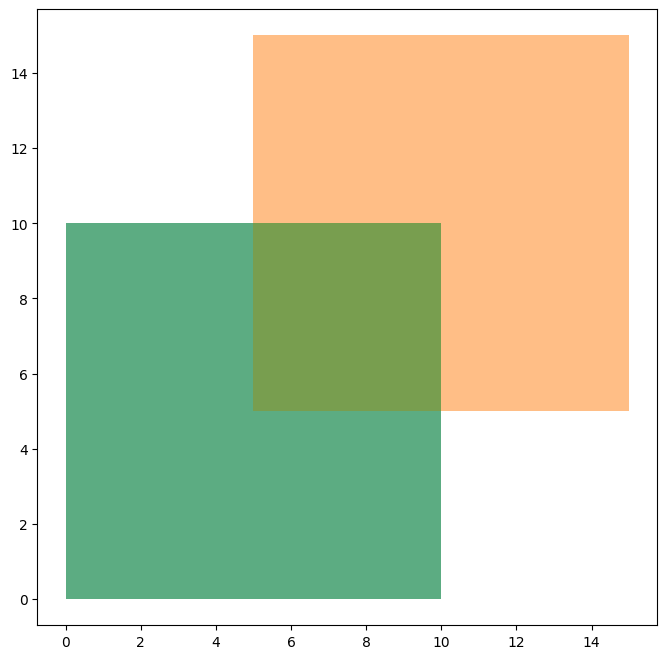

In [5]:
import math
import matplotlib.pyplot as plt


def draw_polygon(polygon: PolygonBase):
    if isinstance(polygon, Polygon):
        plt.fill(
            [vertex.x for vertex in polygon.vertexes],
            [vertex.y for vertex in polygon.vertexes],
            alpha=0.5,
        )

    elif isinstance(polygon, MultiPolygon):
        for simple_polygon in polygon.polygons:
            draw_polygon(simple_polygon)


polygon1 = Polygon(
    [
        Vertex(161, 137),
        Vertex(429, 376),
        Vertex(558, 192),
        Vertex(619, 418),
        Vertex(281, 431),
    ]
)
polygon2 = Polygon(
    [
        Vertex(183, 391),
        Vertex(224, 240),
        Vertex(610, 107),
        Vertex(657, 361),
        Vertex(429, 376),
    ]
)


def cut_polygon_corners_by_line(
    line_vertex_1: Vertex, line_vertex_2: Vertex, polygon: list[Vertex]
) -> list[Intersection]:
    if math.isclose(line_vertex_1.x, line_vertex_2.x):
        return cut_polygon_corners_by_vertical_line(
            line_vertex_1, line_vertex_2, polygon
        )

    return cut_polygon_corners_by_non_vertical_line(
        line_vertex_1, line_vertex_2, polygon
    )


def cut_polygon_corners_by_non_vertical_line(
    line_vertex_1: Vertex, line_vertex_2: Vertex, polygon: list[Vertex]
) -> list[Intersection]:
    return CutByLine(line_vertex_1, line_vertex_2, polygon)


def cut_polygon_corners_by_vertical_line(
    line_vertex_1: Vertex, line_vertex_2: Vertex, polygon: list[Vertex]
) -> list[Intersection]:
    if not math.isclose(line_vertex_1.x, line_vertex_2.x):
        raise ValueError(
            "Use cut_polygon_corners_by_vertical_line only on vertical lines!"
        )

    intersections: list[Intersection] = []

    x = line_vertex_1.x

    shearedList = [
        Vertex(r.x, r.y) for r in polygon
    ]  # TODO why do we need it? Do we change original polygon?

    min_y = min(line_vertex_1.y, line_vertex_2.y)
    max_y = max(line_vertex_1.y, line_vertex_2.y)

    for i in range(len(polygon)):  # TODO: why dont we use shearedList?
        vertex = polygon[i]
        c1 = shearedList[i % len(polygon)]
        c2 = shearedList[(i + 1) % len(polygon)]

        if math.isclose(c1.x, c2.x) and math.isclose(c1.x, x):
            # The current side coincides with the line, there is
            # no intersection point on this side.
            continue
        if (c1.x > x) and (c2.x > x):
            # If current side is fully on the right of the line
            # then there is no intersection.
            continue
        if (x > c1.x) and (x > c2.x):
            # If current side is fully on the left of the line
            # then there is no intersection.
            continue

    # We calculate the intersection point y coordinate (x coordinate is `x`)
    y = float("%.9f" % get_vertical_intersection(x, c1, c2))
    print(f"{c1}, {c2}, {x}, {y}")

    # plt.scatter([x], [y], color="red")

    return CutByVerticalLine(line_vertex_1, line_vertex_2, polygon)

    return intersections


def get_horizontal_intersection(y: float, c1: Vertex, c2: Vertex) -> float:
    return c1.x + (c2.x - c1.x) * (y - c1.y) / (c2.y - c1.y)


def get_vertical_intersection(x: float, c1: Vertex, c2: Vertex) -> float:
    return c1.y + (c2.y - c1.y) * (x - c1.x) / (c2.x - c1.x)


def intersect(polygon1: Polygon, polygon2: Polygon):
    listS = [Corner(vertex) for vertex in polygon1.vertexes]
    listC = [Corner(vertex) for vertex in polygon2.vertexes]
    all_intersection_vertexes: list[Intersection] = []

    for i in range(len(polygon1.vertexes)):
        listS[i - 1].next_corner = listS[i - 1].next = listS[i]  # TODO: remove next...
    for i in range(len(polygon2.vertexes)):
        listC[i - 1].next_corner = listC[i - 1].next = listC[i]  # TODO: remove next...

    for vertex_index in range(len(listC)):
        current_vertex = listC[vertex_index]
        next_vertex = listC[(vertex_index + 1) % len(listC)]

        intersection_vertexes: list[Intersection] = cut_polygon_corners_by_line(
            current_vertex, next_vertex, listS
        )
        if len(intersection_vertexes) == 0:
            continue

        # Intersection vertexes are in clockwise order.
        if math.isclose(current_vertex.x, next_vertex.x):
            # If the current side is vertical
            assert not math.isclose(current_vertex.y, next_vertex.y)

            # and the original polygon has clockwise ordered vertexes
            # the intersection points has to be inserted based on their `y`
            # coordinate.
            intersection_vertexes.sort(
                key=lambda intersection: intersection.y,
                reverse=next_vertex.y >= current_vertex.y,
            )
        else:
            # If current side is not vertical,
            # we have to sort intersection points based on X coordinates
            # from the current vertex to the next vertex.
            intersection_vertexes.sort(
                key=lambda intersection: intersection.x,
                reverse=next_vertex.x < current_vertex.x,
            )

        # We save the intersection vertexes.
        for intersection in intersection_vertexes:
            all_intersection_vertexes.append(intersection)

        # We rewire the next corners in our corner list.
        # The first corner is the current corner, the last corner
        # is the next corner. All intersection points are
        # between this corners
        current_vertex.next = current_vertex.next_corner = intersection_vertexes[
            0
        ]  # TODO: remove next...
        for i in range(len(intersection_vertexes) - 1):
            intersection_vertexes[i].nextC = intersection_vertexes[
                i + 1
            ]  # TODO: why nextC, why not next??
        intersection_vertexes[-1].nextC = next_vertex

    if len(intersection_vertexes) == 0:
        # TODO: polygon1 in polygon2 or outside of it?
        raise ValueError("no intersection!")

    return Compose(all_intersection_vertexes)


polygon1 = Polygon([Vertex(0, 0), Vertex(0, 10), Vertex(10, 10), Vertex(10, 0)])
polygon2 = Polygon([Vertex(5, 5), Vertex(5, 15), Vertex(15, 15), Vertex(15, 5)])

plt.figure(figsize=(8, 8))
plt.axis("equal")

draw_polygon(polygon1)
draw_polygon(polygon2)
diff = intersect(polygon1, polygon2)

print(diff)


for d in diff:
    draw_polygon(Polygon(d))


plt.show()


In [6]:
polygon = [(0,0), (0, 10), (10,10), (10, 0)]
polygon2 = polygon[::-1]
print(compute_signed_area(polygon))
print(compute_signed_area(polygon2))

-100.0
100.0
